# <font color=blue>Clustering & PCA Assignment: HELP International - Countries in need of Humanitarian Aid</font>

In [169]:
# Import all the libraries for data analysis using Clustering & PCA

# Libraries for Dataset analysis
import pandas as pd
import numpy as np

# For Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For Standardisation & Scaling
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

#Importing the PCA module
from sklearn.decomposition import PCA

# For KMeans Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# For Hierarchical Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#Ignore Errors
import warnings
warnings.filterwarnings('ignore')

## <font color=blue>Part 1A : Data Analysis - Socio Economic Data across the countries</font>

In [170]:
#Set option to display max 100 columns & 500 rows
pd.set_option('display.max_columns', 100)
pd.set_option("display.max_rows", 500)

In [171]:
# Read the data from the CSV file into a DataFrame
cntry_df = pd.read_csv("Country-data.csv")

In [172]:
#Get the shape (row and column count of the data)
cntry_df.shape

(167, 10)

In [173]:
#Get the columns wise info - Datatypes and missing values
cntry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [174]:
cntry_df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

##### <font color=blue>As can be seen from the above info, there is no need for Missed values imputation as all values are non-null</font>

In [175]:
# Check for any duplicate entries in the dataset
print(len(cntry_df.country.unique()))

167


##### <font color=blue>As observed there are no duplicate entries in the dataset. So, proceeding to next step.</font>

In [176]:
#Describe the data to see the stats / percentiles for numeric variables
cntry_df.describe(percentiles=[0.05,0.25,0.5,0.60,0.75,0.90,0.95,0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
5%,3.460000,12.120000,2.791000,18.130000,1213.000000,0.183400,55.780000,1.390000,465.900000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
60%,29.160000,40.160000,7.036000,49.160000,14980.000000,6.964000,74.560000,2.670000,7334.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000


In [177]:
#Check the sample values using df.head()
cntry_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### <font color=blue>From the data dictionary, we can infer that the variables "exports", "health", "imports" are actually given as a percentage of each country's own GDP. To get the total per person values of these three columns - we will need to multiply with the gdpp values.</font>

In [178]:
# Get the total exports, health and imports per person
cntry_df['exports_pp']=cntry_df['exports']*cntry_df['gdpp']/100
cntry_df['health_pp']=cntry_df['health']*cntry_df['gdpp']/100
cntry_df['imports_pp']=cntry_df['imports']*cntry_df['gdpp']/100

In [179]:
# Drop the 3 columns as we now have the actual values drived from them
cntry_df.drop(['exports','health','imports'], axis =1 , inplace=True)

### <font color = blue>Univariate Analysis of Numerical variables</font>

In [180]:
# List out the numerical variables that are part of the DataFrame
num_vars=['child_mort','exports_pp','health_pp','imports_pp','income','inflation','life_expec','total_fer','gdpp']

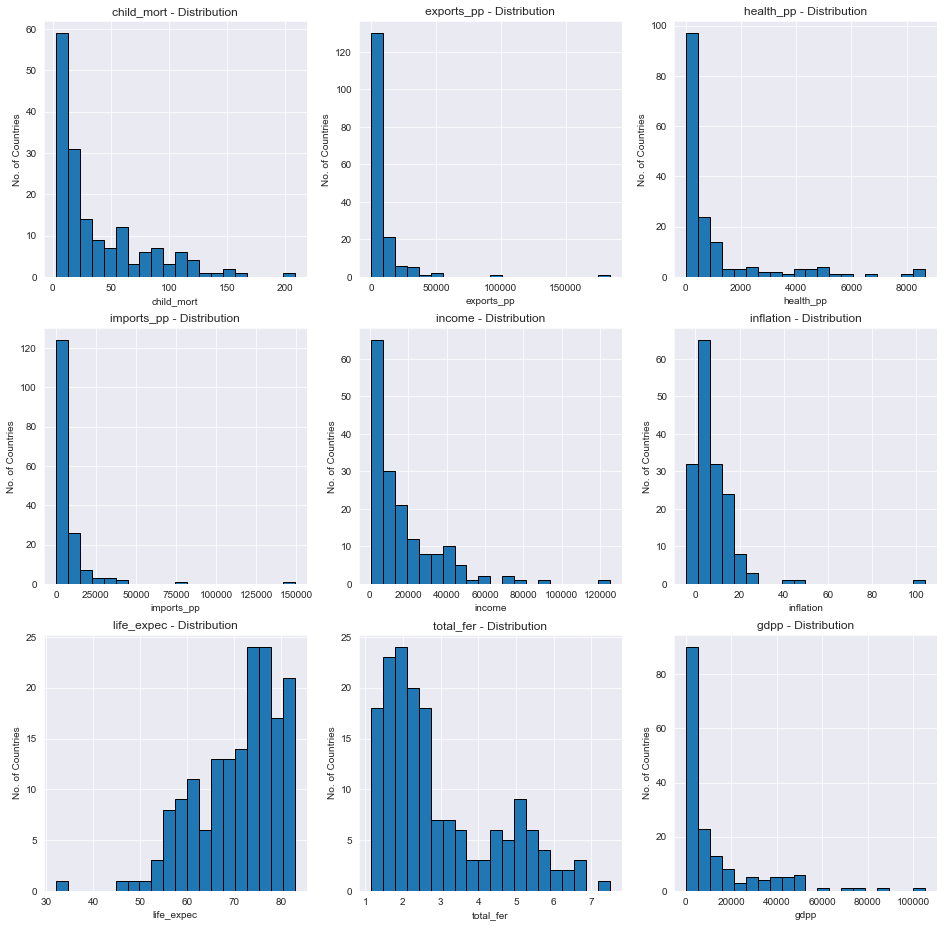

In [181]:
# Visualising the histogram of the distribution of all numeric variables
plt.figure(figsize=(16,16))
for i in range(len(num_vars)):
    plt.subplot(3, 3, i+1)
    var=num_vars[i]
    cntry_df[var].plot.hist(edgecolor = 'k',bins = 20)
    plt.title(var+' - Distribution')
    plt.xlabel(var)
    plt.ylabel('No. of Countries')

##### <font color=blue>From the Univariate analysis using the histograms ploted above, we have the following major observations.
- There are clear trends across all socio-economic factors for all the countries.
- The major indicators like 
    - While majority of countries have the child mortality rate of 50 or below, we still see a good chunk of countries having child_mort > 50
    - Most of the countries are having low income (per person) i.e. Around 60 countries have income per person less than 6000.
    - GDPP: Around 80 countries have GDDP (GDP Per Capita) less than 5000.
</font>

### <font color = blue>Bi-variate (Pair-wise) Plotting and correlation of the numerical variables</font>

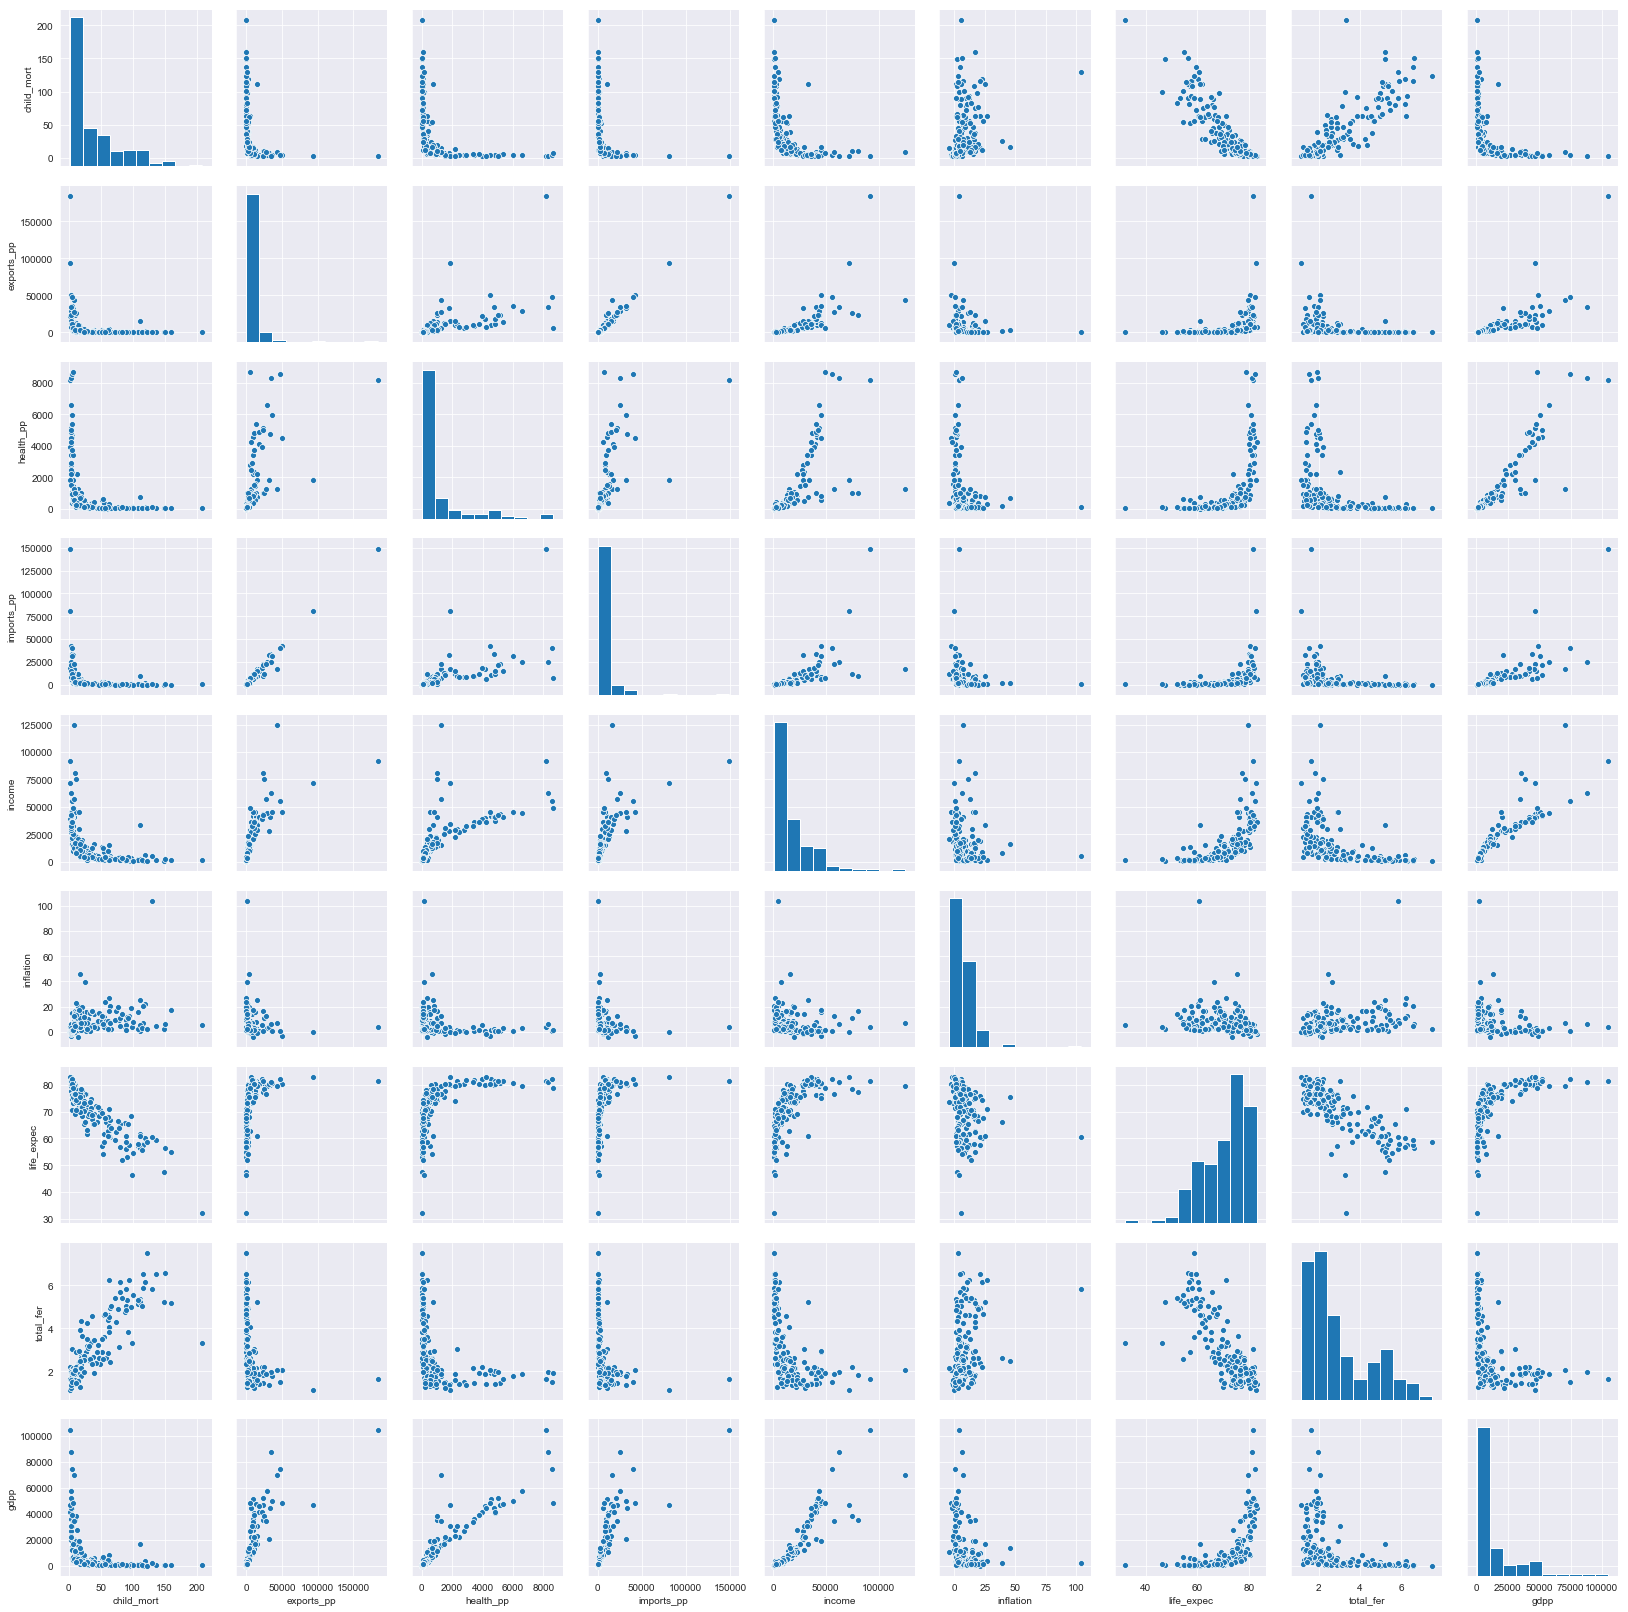

In [182]:
# Visualising pair-wise relationship between the numeric variables
sns.set_style("darkgrid")
sns.pairplot(cntry_df[num_vars])

### <font color = blue>Correlation plot of the numerical variables - Visualise to find out the highly correlated features</font>

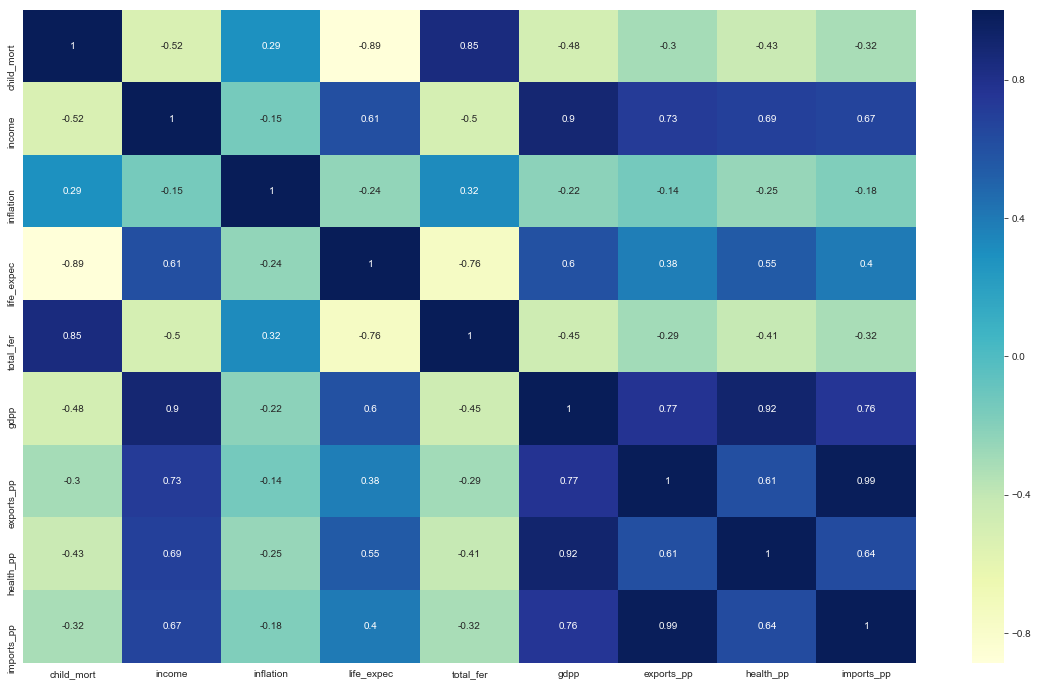

In [183]:
# Set the figure size
plt.figure(figsize=(20,12))

# Generate the heatmap
sns.heatmap(cntry_df.corr(),cmap='YlGnBu', annot=True)

## <font color = blue>From the Correlation plot and the pair-wise plot, we observe the following strong correlations</font>
- Imports & Exports are highly correlated (0.99), proving that the trade is bi-lateral in this highly connected world.
- Health (health care spend per capita) & GDPP are also showing high correlation (0.92), indicating that higher the GDP per capita, higher the value spend to take care of the citizens of the country.
- Income & GDPP (both are per capita) also show strong positive correlation (0.9). This is self-explanatory.
- Child Mortality rate has high negative correlation (-0.89) with Life expectancy. This is a clear indicator that countries having low child mortality rate have very good healthcare standards and hence high Life expectancy.
- Child Mortality rate has high positive correlation (0.85) with Total Fertility rate. This can be understood in two ways. 
    - In countries with high child mortality rate, there is no family planning inspite of poor healthcare services.
    - Higher the number of children born to a mother, greater the the financial burden (assuming the family is in an under developed country) and thus inferior nutrition & healthcare provided to the infant.
- Similarly, life expectancy has good negative correlation with Total fertility (-0.76)
- GDPP shows very good positive correlation with Exports & Imports (0.77 & 0.76 respectively).

### <font color = blue> The next step in the assignment is the outlier analysis. As we are going to transform the variables into Principal Components and will be doing outlier analysis on the same, we can skip the outlier analysis on the actual variables. </font>

## <font color = blue>Part 1B. Principal Component Analysis</font>

In [184]:
# Instantiate an object of MinMaxScaler
standard_scaler = StandardScaler()

# Fit and transform the numerical variables
# Both can be done in single step using fit_transform()
cntry_df_scaled=cntry_df.copy() 
cntry_df_scaled[num_vars] = standard_scaler.fit_transform(cntry_df_scaled[num_vars])
cntry_df_scaled.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_pp,health_pp,imports_pp
0,Afghanistan,1.291532,-0.808245,0.157336,-1.619092,1.902882,-0.679180,-0.411011,-0.565040,-0.432276
1,Albania,-0.538949,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,-0.350191,-0.439218,-0.313677
2,Algeria,-0.272833,-0.220844,0.789274,0.670423,-0.038404,-0.465376,-0.318526,-0.484826,-0.353720
3,Angola,2.007808,-0.585043,1.387054,-1.179234,2.128151,-0.516268,-0.291375,-0.532363,-0.345953
4,Antigua and Barbuda,-0.695634,0.101732,-0.601749,0.704258,-0.541946,-0.041817,-0.104331,-0.178771,0.040735


In [185]:
# Instantiate a PCA object
pca = PCA(svd_solver='randomized', random_state=42)

#Performing the PCA
pca.fit(cntry_df_scaled[num_vars])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [186]:
#List of PCA components.
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [187]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

Text(0, 0.5, 'Cumulative Explained Variance')

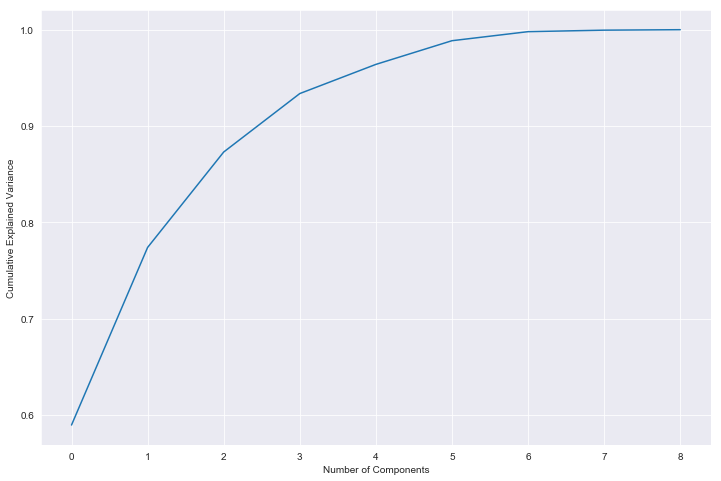

In [188]:
#Plotting the scree plot
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [189]:
# List out the cumulative variance data as a dataframe for a clear picture of the variance values.
variance_df=pd.DataFrame({ 'Component':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'], 'Cumulative_Variance':list(np.cumsum(pca.explained_variance_ratio_)*100)})
variance_df

,Component,Cumulative_Variance
0,PC1,58.937298
1,PC2,77.382467
2,PC3,87.293939
3,PC4,93.366217
4,PC5,96.395389
5,PC6,98.855216
6,PC7,99.794960
7,PC8,99.950602
8,PC9,100.000000


### <font color = blue>Based on the scree plot of the cumulative variance and the PC vs Cumulative variance data listed above, we can see that we are able to achieve a 96% variance explanation with 5 Principal components.</font>

In [190]:
#Understanding how the original 9 variables are loaded on the principal components.
colnames = list(cntry_df_scaled[num_vars].columns)
cntry_pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3],'PC5':pca.components_[4]})
cntry_pcs_df

,Feature,PC1,PC2,PC3,PC4,PC5
0,child_mort,-0.316392,0.476267,-0.150012,-0.148052,0.101995
1,exports_pp,0.342887,0.397311,-0.030574,0.449425,-0.038538
2,health_pp,0.358535,0.155053,-0.075703,-0.599712,-0.493200
3,imports_pp,0.344865,0.370781,-0.072174,0.461798,-0.252787
4,income,0.380041,0.128384,0.145764,-0.154806,0.794075
5,inflation,-0.143085,0.221261,0.948419,-0.007628,-0.136423
6,life_expec,0.343857,-0.369820,0.196752,-0.018395,-0.154041
7,total_fer,-0.302842,0.459715,-0.077834,-0.213928,-0.020336
8,gdpp,0.399988,0.200624,0.010339,-0.364772,0.087501


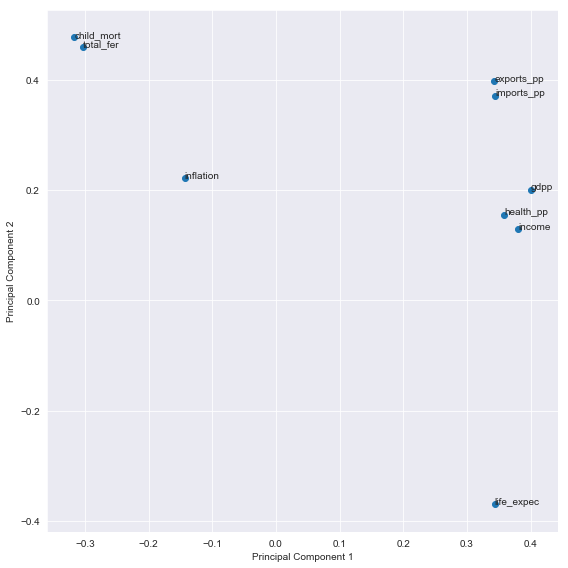

In [191]:
# Let's do a scatter plot using the top two PCs to visualise how these features are loaded
fig = plt.figure(figsize = (8,8))
plt.scatter(cntry_pcs_df.PC1, cntry_pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(cntry_pcs_df.Feature):
    plt.annotate(txt, (cntry_pcs_df.PC1[i],cntry_pcs_df.PC2[i]))
plt.tight_layout()

In [192]:
#Finally let's go ahead and do dimenstionality reduction using the five Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [193]:
# Create the PCA data from the Scaled numerical variables of the country dataframe 
pca_df = pca_final.fit_transform(cntry_df_scaled[num_vars])
pca_df.shape

(167, 5)

In [194]:
pca_df

array([[-2.63633780e+00,  1.47225984e+00, -5.48330498e-01,
         2.38302128e-01,  6.10029273e-02],
       [-2.37829162e-02, -1.43553539e+00, -1.54701978e-02,
        -4.28278354e-01, -1.54305141e-01],
       [-4.59228259e-01, -6.79704711e-01,  9.56536815e-01,
        -1.93531315e-01, -9.21275020e-02],
       [-2.72347181e+00,  2.17496646e+00,  5.97396852e-01,
         4.17695067e-01,  5.66944470e-02],
       [ 6.49103499e-01, -1.02640436e+00, -2.58645163e-01,
        -2.76882415e-01,  7.70873177e-02],
       [ 3.59501355e-02, -6.85691881e-01,  1.46841882e+00,
         4.60321765e-02, -9.31926507e-02],
       [-3.34457119e-01, -1.27861656e+00,  1.90805480e-01,
        -4.77018594e-01, -2.53557140e-01],
       [ 3.18403890e+00, -2.39407303e-01, -1.31692434e-01,
         1.67437937e+00,  8.73676249e-02],
       [ 3.81774167e+00,  2.62449000e-01, -2.58554292e-01,
         1.02465750e+00, -2.99611118e-01],
       [-4.68004699e-01, -4.93948233e-01,  6.11513868e-01,
        -2.76290913e-01

In [195]:
# Creating a transpose so that the each column is properly arranged
pca_dft = np.transpose(pca_df)

In [196]:
# Create a dataframe from the Principal Component values and assign column names
pcs_df2 = pd.DataFrame({'PC1':pca_dft[0],'PC2':pca_dft[1],'PC3':pca_dft[2],'PC4':pca_dft[3],'PC5':pca_dft[4]})

In [197]:
# Check the data in the Dataframe
pcs_df2.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087


In [198]:
# Check the data count
pcs_df2.shape

(167, 5)

In [199]:
# Add the country field on to the principal component Dataframe
pcs_df2['country']=cntry_df_scaled['country']

In [200]:
# Verify the data
pcs_df2.head()

,PC1,PC2,PC3,PC4,PC5,country
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,Afghanistan
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,Albania
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,Algeria
3,-2.723472,2.174966,0.597397,0.417695,0.056694,Angola
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,Antigua and Barbuda


In [201]:
# Describe the dataframe of PCs to check for any outlier data
pcs_df2.describe(percentiles=[0.05,0.25,0.50,0.75,0.95])

,PC1,PC2,PC3,PC4,PC5
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,5.318434e-18,1.462569e-17,-1.662011e-18,-9.141058e-18,5.817037e-19
std,2.310043e+00,1.292227e+00,9.472998e-01,7.405031e-01,5.246024e-01
min,-3.939540e+00,-1.700102e+00,-1.747502e+00,-4.397469e+00,-1.816076e+00
5%,-2.759855e+00,-1.352605e+00,-1.123400e+00,-5.061141e-01,-4.738329e-01
25%,-1.447672e+00,-9.804050e-01,-4.010265e-01,-3.288881e-01,-1.671520e-01
50%,-3.575034e-01,-3.972925e-01,-1.730204e-01,-1.379197e-01,-5.690151e-02
75%,8.501392e-01,6.784352e-01,2.547401e-01,2.117017e-01,9.129827e-02
95%,3.918047e+00,2.174060e+00,1.174755e+00,1.185077e+00,5.360638e-01
max,1.263487e+01,8.223170e+00,7.928612e+00,3.291248e+00,4.252550e+00


#### Let's perform outlier analysis before proceeding to clustering. We will remove the bottom values less than Q1-1.5 * IQR and top values greater than Q1+1.5 * IQR of each of the Principal Components to make sure that the outlier data is not influencing the clusters. This way we are removing the outliers without affecting a lot of the actual data records. The countries that are being removed can be re-assigned based on their values after the clustering is completed.

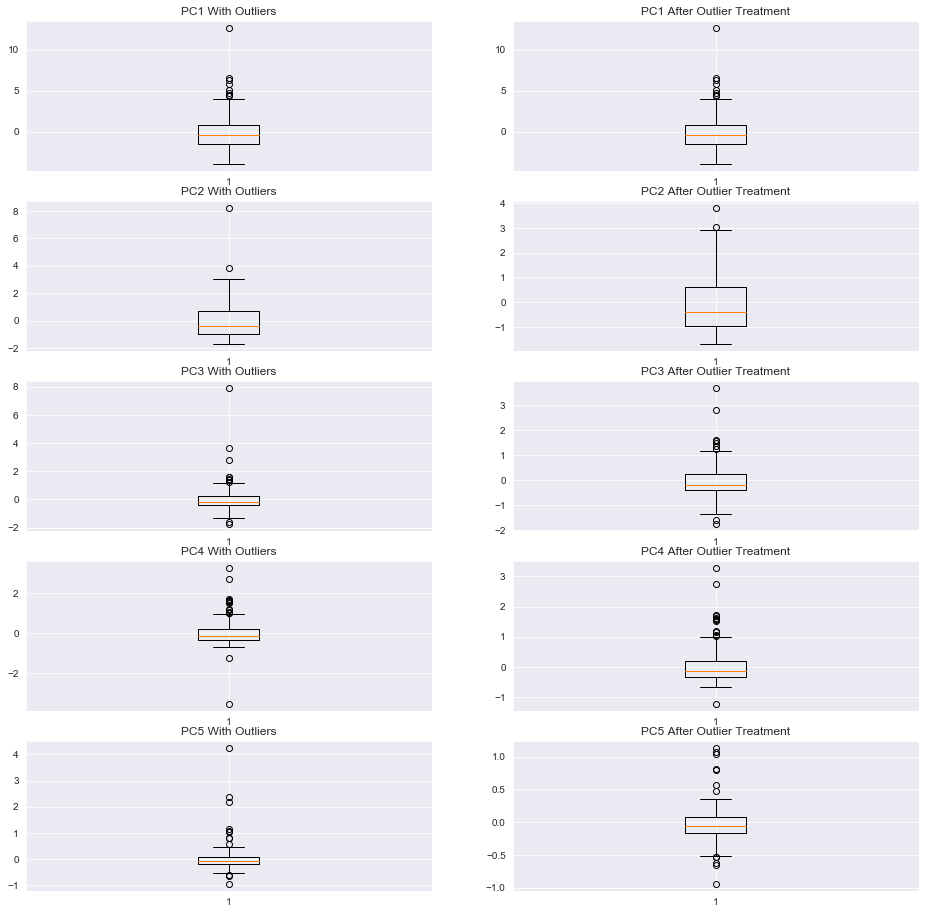

In [202]:
# Create a box plot of all the variables before and after Outlier treatment
plt.figure(figsize=(16,16))
pc_cols=['PC1','PC2','PC3','PC4','PC5']
p=0
for j in range(len(pc_cols)):
    var=pc_cols[j]
    p=p+1
    plt.subplot(5, 2, p)
    plt.title(var+' With Outliers')
    plt.boxplot(pcs_df2[var])
    Q1 = pcs_df2[var].quantile(0.05)
    Q3 = pcs_df2[var].quantile(0.95)
    IQR = Q3 - Q1
    pcs_df2 = pcs_df2[(pcs_df2[var] >= Q1 - 1.5*IQR) & (pcs_df2[var] <= Q3 + 1.5*IQR)]
    p=p+1
    plt.subplot(5, 2, p)
    plt.title(var+' After Outlier Treatment')
    plt.boxplot(pcs_df2[var])

In [203]:
# Describe the dataframe of PCs after outlier treatment
pcs_df2.describe(percentiles=[0.05,0.25,0.50,0.75,0.95])

,PC1,PC2,PC3,PC4,PC5
count,161.000000,161.000000,161.000000,161.000000,161.000000
mean,-0.160859,-0.106887,-0.065712,0.043776,-0.038837
std,1.971393,1.067122,0.708945,0.603814,0.278308
min,-3.939540,-1.700102,-1.747502,-1.229833,-0.945592
5%,-2.752090,-1.365584,-1.140818,-0.488192,-0.462285
25%,-1.518370,-0.986231,-0.404581,-0.323243,-0.165967
50%,-0.368475,-0.429274,-0.173108,-0.141129,-0.057633
75%,0.691420,0.567798,0.236606,0.207556,0.077109
95%,3.786191,2.014527,1.151434,1.193883,0.286445
max,6.266050,3.048509,3.680854,3.291248,1.140071


### <font color = blue>Based on the data above, we can observe that 6 records have been removed as Outliers. We can find these outliers after clustering and re-attach back to the Clustered dataframe and assign appropriate clusters.</font>

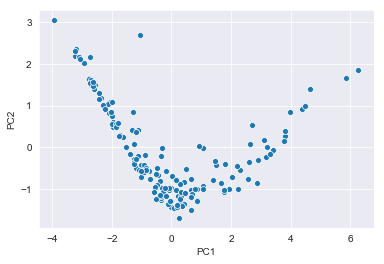

In [204]:
# Visualise the data distribution across the two major Principal Components.
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)

## <font color = blue> Part 1C. Identify the Clusters to be formed </font>

#### Compute the Hopkins score for the Principal Component Dataframe

In [205]:
# Code to compute the Hopkins score
# A higher Hopkins Score ( > 0.5) will indicate that the data is suitable for clustering
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [206]:
#Let's check the Hopkins measure for the 5 Principal Components
pcs_cntry_df=pcs_df2[['PC1','PC2','PC3','PC4','PC5']]
hopkins(pcs_cntry_df)

0.8178201314685675

#### <font color = blue> The Hopkins score of 0.85 indicates that the data is a good fit for Clustering. </font>

### <font color = blue>  Finding the optimal number of Clusters </font>

###  <font color = blue> ELBOW CURVE / SUM OF SQUARED DISTANCES </font>

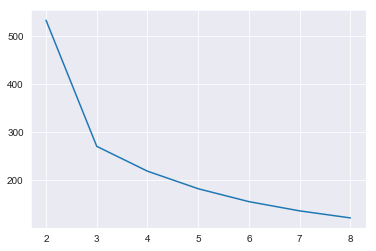

In [207]:
# elbow-curve / SSD
ssd= []
range_n_clusters = [2,3,4,5,6,7,8]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter = 50)
    kmeans.fit(pcs_cntry_df)
    
    ssd.append(kmeans.inertia_)
    
# inertia_ gives the Sum of squared distances of all data points, calculated from each data point to its closest cluster centre
# SSD is shortened form of Sum of Squared distances

# Plot the SSD for each n_clusters
plt.plot(range_n_clusters,ssd)

### <font color = blue> SILHOUETTE SCORE </font>

silhouette score = (p-q)/max(p,q)



- p = Mean Distance to the points in the nearest cluster that the data point is not part of (Avg. value for all data points)
- q = Mean intra-cluster distance to all the points in its own cluster (Avg. value for all data points)


- The value of Silhouette score lies between range of -1 andf +1.
- A score closer to 1 indicates that the data point is very similar to other data points in the cluster.
- A score closer to -1 indicates that the data point is NOT similar to the data points in its cluster.


In [208]:
# Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter = 50)
    kmeans.fit(pcs_cntry_df)
    
    cluster_labels=kmeans.labels_
    
    # silhouette score
    silhouette_score_avg=silhouette_score(pcs_cntry_df,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters,silhouette_score_avg))


For n_clusters=2, the silhouette score is 0.40029890857536693
For n_clusters=3, the silhouette score is 0.4853499284355971
For n_clusters=4, the silhouette score is 0.39461875288487164
For n_clusters=5, the silhouette score is 0.36823953537189236
For n_clusters=6, the silhouette score is 0.36985483322443935
For n_clusters=7, the silhouette score is 0.32764900859260454
For n_clusters=8, the silhouette score is 0.36544359618358063


### <font color = blue> From the Elbow curve and the Silhoutte score, it is clear that we can go ahead with 3 clusters. </font>

## <font color = blue> Part 1D. KMeans Clustering of the Dataframe with Principal Components </font>

In [209]:
# k-means final model with k = 3 clusters

kmeans = KMeans(n_clusters=3, max_iter=50,random_state=100)
kmeans.fit(pcs_cntry_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [210]:
# Check the labels created from KMeans
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1, 2,
       1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1, 0,
       1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 2, 0,
       2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 0,
       1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 0, 0])

In [211]:
# Assign labels to each Customer ID
pcs_df2['ClusterID']=kmeans.labels_
pcs_df2.head()

,PC1,PC2,PC3,PC4,PC5,country,ClusterID
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,Afghanistan,0
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,Albania,1
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,Algeria,1
3,-2.723472,2.174966,0.597397,0.417695,0.056694,Angola,0
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,Antigua and Barbuda,1


In [212]:
# Check the value counts for ClusterID - No. of countries under each cluster
pcs_df2['ClusterID'].value_counts()

1    87
0    47
2    27
Name: ClusterID, dtype: int64

In [213]:
# Create the Kmeans Dataframe by merging the original data with the dataframe containing Principal Components & ClusterIDs
kmeans_cntry_df=pd.merge(cntry_df,pcs_df2,how='left',on='country')

In [214]:
# Check the ClusterID value counts on merged Dataframe
kmeans_cntry_df['ClusterID'].value_counts()

1.0    87
0.0    47
2.0    27
Name: ClusterID, dtype: int64

In [215]:
# Dataframe Info
kmeans_cntry_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 16 columns):
country       167 non-null object
child_mort    167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
exports_pp    167 non-null float64
health_pp     167 non-null float64
imports_pp    167 non-null float64
PC1           161 non-null float64
PC2           161 non-null float64
PC3           161 non-null float64
PC4           161 non-null float64
PC5           161 non-null float64
ClusterID     161 non-null float64
dtypes: float64(13), int64(2), object(1)
memory usage: 22.2+ KB


### <font color = blue> Find out the OUTLIER countries, for which ClusterID is NOT assigned (na). </font>

In [216]:
# Find out the OUTLIER countries for which the cluster has not been assigned
kmeans_cntry_df.loc[kmeans_cntry_df['ClusterID'].isna()]

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_pp,health_pp,imports_pp,PC1,PC2,PC3,PC4,PC5,ClusterID
23,Brunei,10.5,80600,16.700,77.1,1.84,35300,23792.20,1002.520,9884.00,NaN,NaN,NaN,NaN,NaN,NaN
82,Kuwait,10.8,75200,11.200,78.2,2.21,38500,25679.50,1012.550,11704.00,NaN,NaN,NaN,NaN,NaN,NaN
91,Luxembourg,2.8,91700,3.620,81.3,1.63,105000,183750.00,8158.500,149100.00,NaN,NaN,NaN,NaN,NaN,NaN
113,Nigeria,130.0,5150,104.000,60.5,5.84,2330,589.49,118.131,405.42,NaN,NaN,NaN,NaN,NaN,NaN
123,Qatar,9.0,125000,6.980,79.5,2.07,70300,43796.90,1272.430,16731.40,NaN,NaN,NaN,NaN,NaN,NaN
133,Singapore,2.8,72100,-0.046,82.7,1.15,46600,93200.00,1845.360,81084.00,NaN,NaN,NaN,NaN,NaN,NaN


### <font color = blue> Find out the MEAN values of gdpp, child_mort, income from the assigned Clusters. </font>

In [217]:
# Get the Mean values of gdpp, child_mort and income for each ClusterID
clu_gdpp = pd.DataFrame(kmeans_cntry_df.groupby(["ClusterID"]).gdpp.mean())
clu_child_mort= pd.DataFrame(kmeans_cntry_df.groupby(["ClusterID"]).child_mort.mean())
clu_income = pd.DataFrame(kmeans_cntry_df.groupby(["ClusterID"]).income.mean())
kmeans_avg_df = pd.concat([pd.Series([0,1,2]),clu_gdpp,clu_child_mort,clu_income], axis=1)
kmeans_avg_df

,0,gdpp,child_mort,income
0,0,1900.255319,90.793617,3870.702128
1,1,7158.298851,21.113793,13297.586207
2,2,42774.074074,4.481481,39800.000000


### <font color = blue> By verifying the data above and comparing the mean values of each Cluster with the corresponding values from the OUTLIER countries, we can conclud as below </font>
- The GDPP, Child_Mort and Income of Nigeria are closer to Cluster 0. So it belongs to CLuster 0.
- For the remaining 5 countries - Brunei, Kuwait, Luxembourg, Qatar & Singapore, All the 3 features clearly indicate that these countries belong to Cluster 2

In [218]:
# Assign NIGERIA to Cluster 0
kmeans_cntry_df.loc[kmeans_cntry_df['country'] == 'Nigeria', 'ClusterID'] = 0

In [219]:
# Assign the remaining 5 countries to Cluster 2
kmeans_cntry_df.loc[kmeans_cntry_df['country'].isin(['Brunei','Kuwait','Luxembourg','Qatar','Singapore']), 'ClusterID'] = 2

In [220]:
# Get the Cluster wise info of the all the 3 variables which help in deciding & naming the cluster as per the values
print("---------")
print("Cluster 0")
print("---------")
print(kmeans_cntry_df.loc[kmeans_cntry_df.ClusterID == 0][['gdpp','child_mort','income']].describe())
print("---------")
print("Cluster 1")
print("---------")
print(kmeans_cntry_df.loc[kmeans_cntry_df.ClusterID == 1][['gdpp','child_mort','income']].describe())
print("---------")
print("Cluster 2")
print("---------")
print(kmeans_cntry_df.loc[kmeans_cntry_df.ClusterID == 2][['gdpp','child_mort','income']].describe())

---------
Cluster 0
---------
               gdpp  child_mort        income
count     48.000000   48.000000     48.000000
mean    1909.208333   91.610417   3897.354167
std     2925.911009   34.319855   5590.168621
min      231.000000   28.100000    609.000000
25%      551.500000   63.675000   1390.000000
50%      932.000000   89.750000   1860.000000
75%     1465.000000  111.000000   3522.500000
max    17100.000000  208.000000  33700.000000
---------
Cluster 1
---------
               gdpp  child_mort        income
count     87.000000   87.000000     87.000000
mean    7158.298851   21.113793  13297.586207
std     5656.749026   13.925092   8980.625783
min      592.000000    3.400000   1990.000000
25%     2980.000000   10.700000   6720.000000
50%     5080.000000   17.400000  10900.000000
75%    10700.000000   26.900000  17900.000000
max    28000.000000   64.400000  45400.000000
---------
Cluster 2
---------
                gdpp  child_mort         income
count      32.000000   32.000000  

### <font color = blue>Based on the values observed above, we can easily conclude that the Cluster 0 has Under-Developed nations, Cluster 1 are Developing and Cluster 2 is Rich / Developed countries. </font>

In [221]:
# Assign the Cluster Name based on the above analysis
varlist = ['ClusterID']
kmeans_cntry_df['ClusterName'] = kmeans_cntry_df[varlist].apply(lambda x: x.map({0:'UnderDeveloped', 1:'Developing', 2:'Developed'}))

kmeans_cntry_df.ClusterName.value_counts()


Developing        87
UnderDeveloped    48
Developed         32
Name: ClusterName, dtype: int64

### <font color = blue> So we end up 48 countries which are Under-Developed, 87 Developing countries and 32 Developed countries. We will further do Clustering based on Hierarchical (both Single & Complete linkages), and can choose the best of all the models. </font>

## <font color =blue> Part 1E. HIERARCHICAL CLUSTERING </font>

### <font color = blue> Single Linkage </blue>

In [222]:
# Check the Dataframe with the Principal Components
pcs_cntry_df.shape

(161, 5)

In [223]:
# Verify the data
pcs_cntry_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087


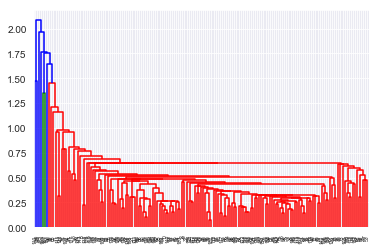

In [224]:
# Build Single Linkage Hierarchical CLustering Model
hier_single = linkage(pcs_cntry_df, method = "single", metric = "euclidean")

# Plot the Dendrogram of the Single linkage Hierarchical model
dendrogram(hier_single)
plt.show()

In [225]:
# Cut the Hierarchical tree to form 3 clusters (as envisioned in the Elbow curve and Silhouette score)
single_labels = cut_tree(hier_single, n_clusters=3).reshape(-1, )
single_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [226]:
# Assign labels under the name CLusterID to the dataframe
pcs_df2['ClusterID']=single_labels
pcs_df2.head()

,PC1,PC2,PC3,PC4,PC5,country,ClusterID
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,Afghanistan,0
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,Albania,0
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,Algeria,0
3,-2.723472,2.174966,0.597397,0.417695,0.056694,Angola,0
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,Antigua and Barbuda,0


In [227]:
# Get the counts under each Cluster
pcs_df2['ClusterID'].value_counts()

0    158
2      2
1      1
Name: ClusterID, dtype: int64

In [228]:
# Merge the Country Dataframe with the scaled PC dataframe containing CLusterID
hier_single_df=pd.merge(cntry_df,pcs_df2,how='left',on='country')

In [229]:
# Check the Outlier Countries in the DataFrame
hier_single_df.loc[hier_single_df['ClusterID'].isna()]

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_pp,health_pp,imports_pp,PC1,PC2,PC3,PC4,PC5,ClusterID
23,Brunei,10.5,80600,16.700,77.1,1.84,35300,23792.20,1002.520,9884.00,NaN,NaN,NaN,NaN,NaN,NaN
82,Kuwait,10.8,75200,11.200,78.2,2.21,38500,25679.50,1012.550,11704.00,NaN,NaN,NaN,NaN,NaN,NaN
91,Luxembourg,2.8,91700,3.620,81.3,1.63,105000,183750.00,8158.500,149100.00,NaN,NaN,NaN,NaN,NaN,NaN
113,Nigeria,130.0,5150,104.000,60.5,5.84,2330,589.49,118.131,405.42,NaN,NaN,NaN,NaN,NaN,NaN
123,Qatar,9.0,125000,6.980,79.5,2.07,70300,43796.90,1272.430,16731.40,NaN,NaN,NaN,NaN,NaN,NaN
133,Singapore,2.8,72100,-0.046,82.7,1.15,46600,93200.00,1845.360,81084.00,NaN,NaN,NaN,NaN,NaN,NaN


In [230]:
print("---------")
print("Cluster 0")
print("---------")
print(hier_single_df.loc[hier_single_df.ClusterID == 0][['gdpp','child_mort','income']].describe())
print("---------")
print("Cluster 1")
print("---------")
print(hier_single_df.loc[hier_single_df.ClusterID == 1][['gdpp','child_mort','income']].describe())
print("---------")
print("Cluster 2")
print("---------")
print(hier_single_df.loc[hier_single_df.ClusterID == 2][['gdpp','child_mort','income']].describe())

---------
Cluster 0
---------
               gdpp  child_mort        income
count    158.000000  158.000000    158.000000
mean   10680.278481   38.648734  14315.905063
std    14135.879796   39.823687  13565.631985
min      231.000000    2.600000    609.000000
25%     1310.000000    8.625000   3290.000000
50%     4520.000000   20.050000   9890.000000
75%    12175.000000   62.150000  20325.000000
max    58000.000000  208.000000  57600.000000
---------
Cluster 1
---------
          gdpp  child_mort   income
count      1.0         1.0      1.0
mean   17100.0       111.0  33700.0
std        NaN         NaN      NaN
min    17100.0       111.0  33700.0
25%    17100.0       111.0  33700.0
50%    17100.0       111.0  33700.0
75%    17100.0       111.0  33700.0
max    17100.0       111.0  33700.0
---------
Cluster 2
---------
               gdpp  child_mort        income
count      2.000000    2.000000      2.000000
mean   81200.000000    3.850000  58900.000000
std     9333.809512    0.919239   

### <font color = blue> From the above statistics, it is clear that the Hierarchical Clustering with Single linkage is not forming any meningful clusters. So, we can ignore the Single linkage clustering and proceed to Complete linkage </font>

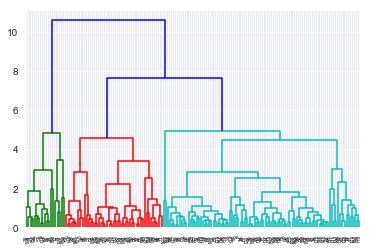

In [231]:
# Complete Linkage
hier_complete = linkage(pcs_cntry_df, method = "complete", metric = "euclidean")

# Plot the Dendrogram of the Complete linkage Hierarchical model
dendrogram(hier_complete)
plt.show()

In [232]:
# Cut the Complete linkage Dendrogram into 3 clusters
complete_labels = cut_tree(hier_complete, n_clusters=3).reshape(-1, )
complete_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 2, 0,
       2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 0, 0])

In [233]:
# Assign the CLusters back to the Scale Principal Components Dataframe
pcs_df2['ClusterID']=complete_labels
pcs_df2.head()

,PC1,PC2,PC3,PC4,PC5,country,ClusterID
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,Afghanistan,0
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,Albania,1
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,Algeria,1
3,-2.723472,2.174966,0.597397,0.417695,0.056694,Angola,0
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,Antigua and Barbuda,1


In [234]:
# Get the value counts under each Cluster 
pcs_df2['ClusterID'].value_counts()

1    95
0    47
2    19
Name: ClusterID, dtype: int64

In [235]:
# Merge the Country Dataframe with the scaled PC dataframe containing CLusterID
hier_complete_df=pd.merge(cntry_df,pcs_df2,how='left',on='country')

In [236]:
# Check the Outlier Countries in the DataFrame
hier_complete_df.loc[hier_complete_df['ClusterID'].isna()]

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_pp,health_pp,imports_pp,PC1,PC2,PC3,PC4,PC5,ClusterID
23,Brunei,10.5,80600,16.700,77.1,1.84,35300,23792.20,1002.520,9884.00,NaN,NaN,NaN,NaN,NaN,NaN
82,Kuwait,10.8,75200,11.200,78.2,2.21,38500,25679.50,1012.550,11704.00,NaN,NaN,NaN,NaN,NaN,NaN
91,Luxembourg,2.8,91700,3.620,81.3,1.63,105000,183750.00,8158.500,149100.00,NaN,NaN,NaN,NaN,NaN,NaN
113,Nigeria,130.0,5150,104.000,60.5,5.84,2330,589.49,118.131,405.42,NaN,NaN,NaN,NaN,NaN,NaN
123,Qatar,9.0,125000,6.980,79.5,2.07,70300,43796.90,1272.430,16731.40,NaN,NaN,NaN,NaN,NaN,NaN
133,Singapore,2.8,72100,-0.046,82.7,1.15,46600,93200.00,1845.360,81084.00,NaN,NaN,NaN,NaN,NaN,NaN


### <font color = blue> Find out the MEAN values of gdpp, child_mort, income from the assigned Clusters in hier_complete_df. </font>

In [237]:
# Get the Mean values of gdpp, child_mort and income for each ClusterID
clu_gdpp_h = pd.DataFrame(hier_complete_df.groupby(["ClusterID"]).gdpp.mean())
clu_child_mort_h= pd.DataFrame(hier_complete_df.groupby(["ClusterID"]).child_mort.mean())
clu_income_h = pd.DataFrame(hier_complete_df.groupby(["ClusterID"]).income.mean())
hc_avg_df = pd.concat([pd.Series([0,1,2]),clu_gdpp_h,clu_child_mort_h,clu_income_h], axis=1)
hc_avg_df

,0,gdpp,child_mort,income
0,0,1900.255319,90.793617,3870.702128
1,1,8881.810526,19.740000,14983.052632
2,2,49152.631579,4.347368,42531.578947


### <font color = blue> By verifying the data above and comparing the mean values of each Cluster with the corresponding values from the OUTLIER countries, we can conclud as below </font>
- The GDPP, Child_Mort and Income of Nigeria are closer to Cluster 0. So it belongs to CLuster 0.
- For the remaining 5 countries - Brunei, Kuwait, Luxembourg, Qatar & Singapore, All the 3 features clearly indicate that these countries belong to Cluster 2

In [238]:
# Assign NIGERIA to Cluster 0
hier_complete_df.loc[hier_complete_df['country'] == 'Nigeria', 'ClusterID'] = 0

In [239]:
# Assign the remaining 5 countries to Cluster 2
hier_complete_df.loc[hier_complete_df['country'].isin(['Brunei','Kuwait','Luxembourg','Qatar','Singapore']), 'ClusterID'] = 2

In [240]:
# Get the Cluster wise info of the all the 3 variables which help in deciding & naming the cluster as per the values
print("---------")
print("Cluster 0")
print("---------")
print(hier_complete_df.loc[hier_complete_df.ClusterID == 0][['gdpp','child_mort','income']].describe())
print("---------")
print("Cluster 1")
print("---------")
print(hier_complete_df.loc[hier_complete_df.ClusterID == 1][['gdpp','child_mort','income']].describe())
print("---------")
print("Cluster 2")
print("---------")
print(hier_complete_df.loc[hier_complete_df.ClusterID == 2][['gdpp','child_mort','income']].describe())

---------
Cluster 0
---------
               gdpp  child_mort        income
count     48.000000   48.000000     48.000000
mean    1909.208333   91.610417   3897.354167
std     2925.911009   34.319855   5590.168621
min      231.000000   28.100000    609.000000
25%      551.500000   63.675000   1390.000000
50%      932.000000   89.750000   1860.000000
75%     1465.000000  111.000000   3522.500000
max    17100.000000  208.000000  33700.000000
---------
Cluster 1
---------
               gdpp  child_mort        income
count     95.000000   95.000000     95.000000
mean    8881.810526   19.740000  14983.052632
std     7983.215558   14.085993  10609.433886
min      592.000000    3.200000   1990.000000
25%     3075.000000    9.350000   7295.000000
50%     6030.000000   16.600000  12700.000000
75%    12050.000000   25.600000  20100.000000
max    35000.000000   64.400000  57600.000000
---------
Cluster 2
---------
                gdpp  child_mort         income
count      24.000000    24.00000  

### <font color = blue>Based on the values observed above, we can easily conclude that the Cluster 0 has Under-Developed nations, Cluster 1 are Developing and Cluster 2 is Rich / Developed countries. </font>

In [241]:
# Assign the Cluster Name based on the above analysis
varlist = ['ClusterID']
hier_complete_df['ClusterName'] = hier_complete_df[varlist].apply(lambda x: x.map({0:'UnderDeveloped', 1:'Developing', 2:'Developed'}))

hier_complete_df.ClusterName.value_counts()

Developing        95
UnderDeveloped    48
Developed         24
Name: ClusterName, dtype: int64

### <font color = blue> So we end up 48 countries which are Under-Developed, 95 Developing countries and 24 Developed countries. We will compare these details with KMeans results and decide which model is more accurate. </font>

### <font color = blue> Between KMeans model and Hierarchical Complete Linkage model, the "UnderDeveloped" countries are exactly the same (48). The only difference is that 8 out of 32 countries which are clustered as "Developed" in KMeans are under the "Developing" cluster in Hierarchical Complete linkage model. Let's analyze these 8 and find out to which group they are more appropriate for.   </font>

In [242]:
# Get the countries that are grouped differently in KMeans and Hierarchical Complete Linkage models
hier_kmeans_diff = pd.merge(hier_complete_df.loc[hier_complete_df.ClusterID == 1],kmeans_cntry_df.loc[kmeans_cntry_df.ClusterID == 1][['country','ClusterID']],how="left",on="country")
hier_kmeans_diff.shape

(95, 18)

In [243]:
# Filter out only the countries that are present in her complete cluster 1 and not in kmeans cluster 1
hier_kmeans_diff=hier_kmeans_diff.loc[hier_kmeans_diff.ClusterID_y.isna()]

In [244]:
hier_kmeans_diff

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_pp,health_pp,imports_pp,PC1,PC2,PC3,PC4,PC5,ClusterID_x,ClusterName,ClusterID_y
24,Cyprus,3.6,33900,2.010,79.9,1.42,30800,15461.6,1838.76,17710.0,2.313754,-0.550776,-0.069012,-0.141129,0.189213,1.0,Developing,NaN
33,Greece,3.9,28700,0.673,80.4,1.48,26900,5944.9,2770.70,8258.3,1.931549,-1.017631,-0.200727,0.620710,-0.056212,1.0,Developing,NaN
41,Israel,4.6,29600,1.770,81.4,3.03,30600,10710.0,2334.78,10067.4,1.784209,-0.397293,-0.154210,0.615362,0.092054,1.0,Developing,NaN
53,Malta,6.8,28300,3.830,80.3,1.36,21100,32283.0,1825.15,32494.0,2.632762,0.075126,-0.055136,-1.229833,-0.470955,1.0,Developing,NaN
68,Portugal,3.9,27200,0.643,79.8,1.39,22500,6727.5,2475.00,8415.0,1.760117,-1.086170,-0.215438,0.383998,-0.068933,1.0,Developing,NaN
76,Slovenia,3.2,28700,-0.987,79.5,1.57,23400,15046.2,2201.94,14718.6,2.041421,-0.726673,-0.397472,-0.065102,-0.052978,1.0,Developing,NaN
78,Spain,3.8,32500,0.160,81.9,1.37,30700,7828.5,2928.78,8227.6,2.244964,-1.001793,-0.186867,0.711405,0.061316,1.0,Developing,NaN
89,United Arab Emirates,8.6,57600,12.500,76.5,1.87,35000,27195.0,1281.00,22260.0,2.689931,0.540482,0.923005,-0.484675,1.140071,1.0,Developing,NaN


In [245]:
hc_avg_df

,0,gdpp,child_mort,income
0,0,1900.255319,90.793617,3870.702128
1,1,8881.810526,19.740000,14983.052632
2,2,49152.631579,4.347368,42531.578947


### <font color = blue> By verifying these values above, it is apparent that the 8 countries are more of  OUTLIERS in "Developing" countries cluster and may actually belong to "Developed" countries cluster. This implies that KMeans has come up with overall best Clusters for the Developing/Developed nations. Although for our purpose of analysis "Under-Developed" countries, both the Models has exactly same "Under-Developed" cluster. We will proceed with KMeans model for our further analysis.</font>

## <font color = blue>Part 1F. Plotting & Visualising the Clusters based on the dataset features & Principal Components </font>

#### <font color = blue> Plotting the data in the KMeans dataframe - Visualising the distribution of clusters based on the important Socio-Econimoc factors and also the Principal Components used </font>

#### <font color = blue> Scatter Plot of the Clusters with GDPP and Child Mortality Rate </font>

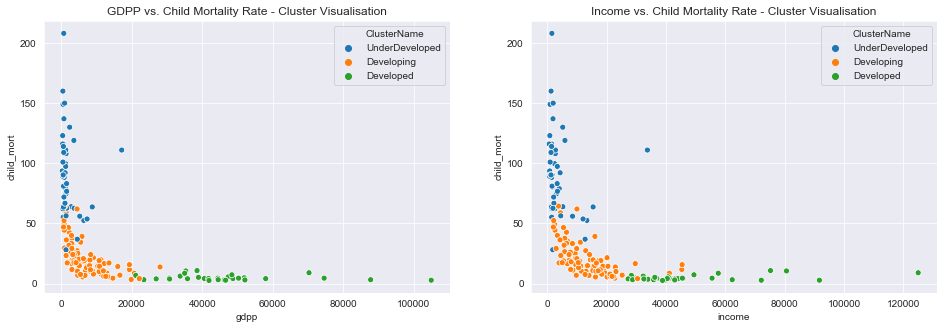

In [246]:
fig = plt.figure(figsize = (16,5))

plt.subplot(1, 2, 1)
plt.title("GDPP vs. Child Mortality Rate - Cluster Visualisation")
sns.scatterplot(x='gdpp',y='child_mort',hue='ClusterName',data=kmeans_cntry_df)


plt.subplot(1, 2, 2)
plt.title("Income vs. Child Mortality Rate - Cluster Visualisation")
sns.scatterplot(x='income',y='child_mort',hue='ClusterName',data=kmeans_cntry_df)

#### <font color = blue> From the above scatter plot, it is clearly visible that: </font>
- The countries with high Child Mortality Rate and very low income/GDPP are clustered as "UnderDeveloped"
- The countries with relatively lower Child Mortality Rate and medium income/GDPP are clustered as "Developing"
- The countries with very low Child Mortality Rate and high income/GDPP are clustered as "Developed"

#### <font color = blue> Scatter Plot of the Clusters with the top two Principal Components </font>

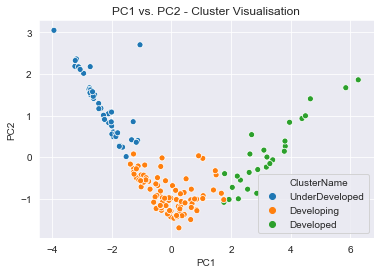

In [247]:
plt.title("PC1 vs. PC2 - Cluster Visualisation")
sns.scatterplot(x='PC1',y='PC2',hue='ClusterName',data=kmeans_cntry_df)

<font color = blue> The two Principal Components have done very clear representation of the Clusters to be formed. "UnderDeveloped" cluster has high PC2 and low PC1. "Developing" cluster has low PC2 and PC1 values. "Developed" cluster has high PC1 and PC2 values. </font>

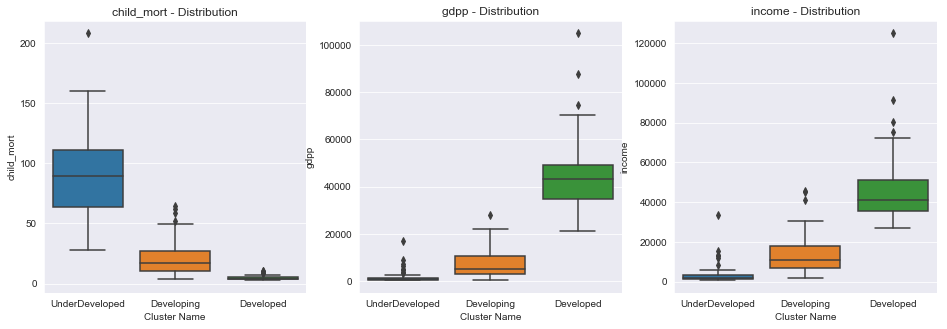

In [248]:
# Plot 
# Visualising the boxplot of the distribution of 3 socio-economic dactors in clusters
plt.figure(figsize=(16,5))

eco_factors=['child_mort','gdpp','income']

for i in range(len(eco_factors)):
    plt.subplot(1, 3, i+1)
    var=eco_factors[i]
    sns.boxplot(x='ClusterName',y=var,data=kmeans_cntry_df)
    plt.title(var+' - Distribution')
    plt.xlabel('Cluster Name')
    plt.ylabel(var)




### <font color = blue> From the box plots seen above it is clearly evident that the UnderDeveloped cluster has the highest average Child Mortality Rate, lowest GDPP and INCOME among all 3 clusters. But as we already have 48 countries in this cluster, we will have to identify the list of countries that are performing poorly in all 3 factors, not just 1 or 2 of them. We will be doing further analysis in the next part and arrive at the final list countries to be recommended.</font>

## <font color = blue> Part 1G. Identifying the countries in need of aid based on socio-economic factors </font> 

In [249]:
# Let's recall the dataframe containing the Average of gdpp, child_mort and income from all Clusters formed through KMeans
kmeans_avg_df

,0,gdpp,child_mort,income
0,0,1900.255319,90.793617,3870.702128
1,1,7158.298851,21.113793,13297.586207
2,2,42774.074074,4.481481,39800.000000


In [250]:
# Identify the UnderDeveloped countries with lower GDPP & Income, and higher Child Mortality rate - when compared to the mean 
# values of the corresponding Cluster 
countries_need_aid = kmeans_cntry_df.loc[
    (kmeans_cntry_df['ClusterName']=='UnderDeveloped') & 
    (kmeans_cntry_df['gdpp'] < kmeans_avg_df.iloc[0]['gdpp']) & 
    (kmeans_cntry_df['income'] < kmeans_avg_df.iloc[0]['income']) & 
    (kmeans_cntry_df['child_mort'] > kmeans_avg_df.iloc[0]['child_mort'])][['country','gdpp','income','child_mort']]

countries_need_aid.reset_index(inplace=True)

# List out the countries along with the 3 socio-economic factors, sorted based on Descending values of Child Mortality Rate
countries_need_aid.sort_values(by='child_mort',ascending=False)

,index,country,gdpp,income,child_mort
10,66,Haiti,662,1500,208.0
16,132,Sierra Leone,399,1220,160.0
5,32,Chad,897,1930,150.0
4,31,Central African Republic,446,888,149.0
12,97,Mali,708,1870,137.0
15,112,Niger,348,814,123.0
6,37,"Congo, Dem. Rep.",334,609,116.0
1,25,Burkina Faso,575,1430,116.0
9,64,Guinea-Bissau,547,1390,114.0
0,17,Benin,758,1820,111.0


### <font color = blue> Visualise all 17 countries in terms of GDPP and Child Mortality Rate </font>

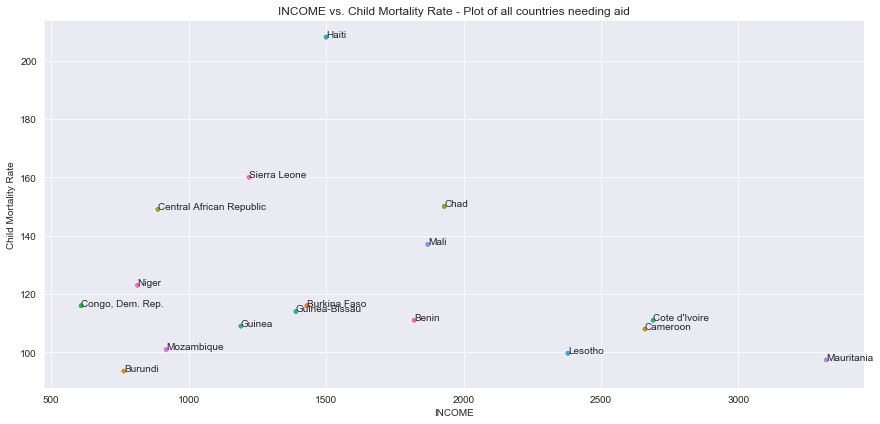

In [251]:
fig = plt.figure(figsize = (24,6))

plt.subplot(1, 2, 1)
plt.title("INCOME vs. Child Mortality Rate - Plot of all countries needing aid")
sns.scatterplot(x='income',y='child_mort',hue='country',data=countries_need_aid,legend=False)
for i, txt in enumerate(countries_need_aid.country):
    plt.annotate(txt, (countries_need_aid.income[i],countries_need_aid.child_mort[i]))
plt.xlabel('INCOME')
plt.ylabel('Child Mortality Rate')
plt.tight_layout()

## <font color = blue> Conclusion: The 17 countries listed below are in dire need to Financial & humanitarian aid to battle high Child Mortality Rate & low Income/GDPP </font>

In [252]:
print("The 17 countries listed below are in dire need to Financial & humanitarian aid to battle high Child Mortality Rate & low Income")
for i,txt in enumerate(countries_need_aid.sort_values(by='child_mort',ascending=False)['country']):
    print(txt)

The 17 countries listed below are in dire need to Financial & humanitarian aid to battle high Child Mortality Rate & low Income
Haiti
Sierra Leone
Chad
Central African Republic
Mali
Niger
Congo, Dem. Rep.
Burkina Faso
Guinea-Bissau
Benin
Cote d'Ivoire
Guinea
Cameroon
Mozambique
Lesotho
Mauritania
Burundi
